In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df_real=pd.read_csv("True.csv")

In [6]:
df_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
df_real.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
df_fake=pd.read_csv("Fake.csv")

In [9]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [11]:
df_real['label']=1
df_fake['label']=0

In [12]:
df=pd.concat([df_fake,df_real],axis=0)

In [13]:
df=df.sample(frac=1).reset_index(drop=True)

In [14]:
print(df.dtypes)

title      object
text       object
subject    object
date       object
label       int64
dtype: object


In [15]:
df=df[['text','label']]

In [16]:
vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7)

In [17]:
X=vectorizer.fit_transform(df['text'])
y=df['label']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [20]:
model=PassiveAggressiveClassifier()

In [21]:
model.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [22]:
y_pred=model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy=accuracy_score(y_test,y_pred)

In [25]:
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.99


In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

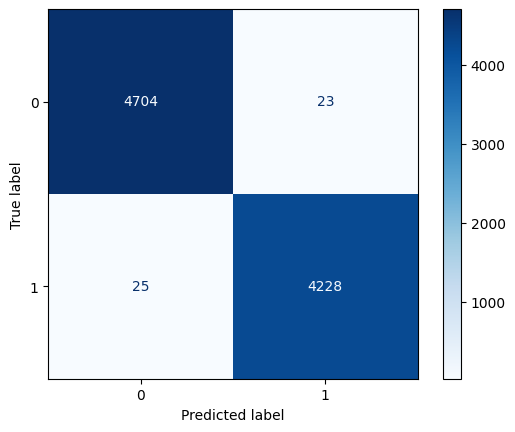

In [27]:
disp=ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='Blues')

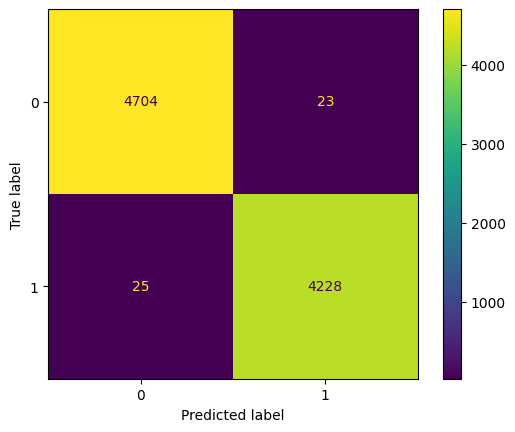

In [28]:
disp.plot()

In [29]:
import pickle

In [30]:
pickle.dump(model,open('model.pkl','wb'))

In [31]:
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))

In [32]:
with open('model.pkl','rb')as model_file:
    loaded_model=pickle.load(model_file)

In [33]:
with open('vectorizer.pkl','rb')as vectorizer_file:
    loaded_vectorizer=pickle.load(vectorizer_file)

In [34]:
input_text="Donald trump wins 2016 U.S presidential election"
input_vector=loaded_vectorizer.transform([input_text])

In [35]:
prediction=loaded_model.predict(input_vector)

In [36]:
if prediction==0:
    print("Fake news")
else:
    print("Real news")

Real news
